In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
from pmdarima.arima import auto_arima

In [152]:
data = pd.read_csv("India_confirmed_23_5_21 - Sheet1(1).csv")

In [153]:
data.head()


,Date,Cases
0,1/23/20,0
1,1/24/20,0
2,1/25/20,0
3,1/26/20,0
4,1/27/20,0


In [154]:
data.tail()

,Date,Cases
482,5/19/21,276110
483,5/20/21,259551
484,5/21/21,257299
485,5/22/21,240842
486,5/23/21,222315


In [155]:
data.dtypes

Date     object
Cases     int64
dtype: object

In [156]:
data['Date']=pd.to_datetime(data['Date'])

In [157]:
data.dtypes

Date     datetime64[ns]
Cases             int64
dtype: object

In [158]:
data.set_index('Date',inplace=True)

In [159]:
data.head()

,Cases
Date,
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0


<AxesSubplot:xlabel='Date'>

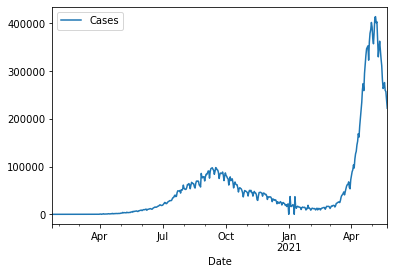

In [160]:
data.plot()

In [161]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.01, False)

In [162]:
train = data[:450]
test = data[-37:]

In [163]:
train.tail()

,Cases
Date,
2021-04-12,161736
2021-04-13,184372
2021-04-14,200739
2021-04-15,217353
2021-04-16,234692


In [164]:
test.head(87)


,Cases
Date,
2021-04-17,261394
2021-04-18,273802
2021-04-19,259167
2021-04-20,295158
2021-04-21,314644
2021-04-22,332921
2021-04-23,346786
2021-04-24,349691
2021-04-25,352991


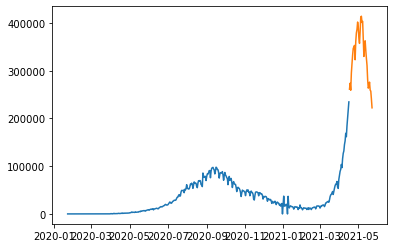

In [165]:
plt.plot(train)
plt.plot(test)

In [166]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8985.091, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8982.643, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8982.157, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8987.380, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8984.039, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8983.767, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8978.525, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8925.986, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8978.259, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8872.614, Time=0.99 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8967.439, Time=0.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8903.006, Time=1.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8872.483, Time=1.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : 

In [167]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  450
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -4396.730
Date:                Mon, 14 Jun 2021   AIC                           8815.460
Time:                        15:46:30   BIC                           8860.637
Sample:                             0   HQIC                          8833.268
                                - 450                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0972      0.092      1.054      0.292      -0.083       0.278
ar.L2          0.1013      0.109      0.929      0.353      -0.112       0.315
ar.L3          0.5193      0.079      6.560      0.000       0.364       0.674
ar.L4          0.6732      0.113      5.949      0.000       0.451       0.895
ar.L5         -0.3923      0.086     -4.545      0.000      -0.561      -0.223
ma.L1         -0.4118      0.089     -4.616      0.000      -0.587      -0.237
ma.L2         -0.2252      0.118     -1.915      0.055      -0.456       0.005
ma.L3         -0.3365      0.084     -4.012      0.000      -0.501      -0.172
ma.L4         -0.4262      0.107     -3.982      0.000      -0.636      -0.216
ma.L5          0.7648      0.085      9.045      0.000       0.599       0.931
sigma2      2.217e+07   8.09e-09   2.74e+15      0.000    2.22e+07    2.22e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1374.64
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             154.98   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.8e+30. Standard errors may be unstable.
"""

In [168]:
prediction= pd.DataFrame(arima_model.predict(n_periods = 37),index=test.index)
prediction.columns = ['predicted_sales']
prediction


,predicted_sales
Date,
2021-04-17,245223.714864
2021-04-18,257786.079670
2021-04-19,268416.547086
2021-04-20,284666.211479
2021-04-21,301851.251668
2021-04-22,315012.361589
2021-04-23,328697.782799
2021-04-24,347053.119982
2021-04-25,362251.133624


ValueError: Unrecognized location 'Left corner'. Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center


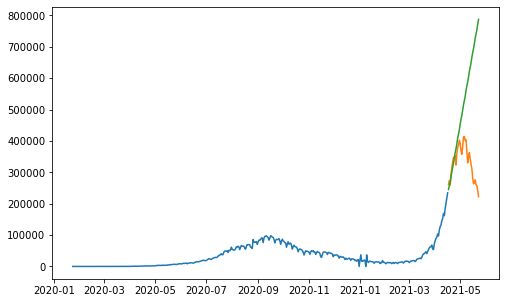

In [169]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()


In [170]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['predicted_sales'] = prediction
mse = mean_squared_error(test['Cases'], test['predicted_sales'])
rmse = sqrt(mse)
print(rmse)
   

260165.72014216764
